<a href="https://colab.research.google.com/github/djsabelo/Samsung/blob/main/Data_wrangling_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Data Wrangling!

## This time we will learn about missing values and also how to deal with them

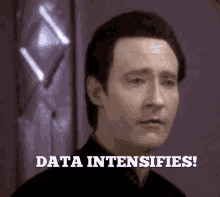

# Load necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Get the project structure (if you don't have already)

In [4]:
!git clone "https://github.com/djsabelo/Samsung.git"

fatal: destination path 'Samsung' already exists and is not an empty directory.


# Data maker

## We are going to create our own dataset - using random stuff, so good luck

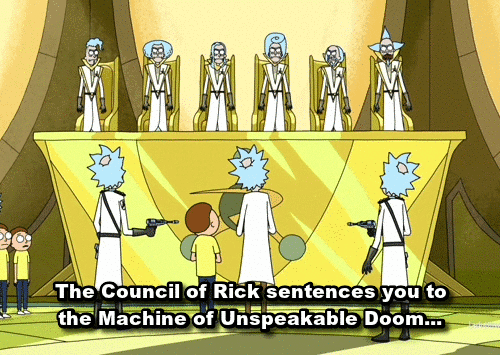

### The dataset we are going to create is composed of the salaries for several employees, which may have the same name

It has 4 columns, "Name", "Gender", "Salary", and "Age"

In [5]:
import os
df_names = pd.read_excel("Samsung/Data Wrangling - Optimizations/Data/most-popular-baby-names-2005-current-3.xlsx")
df_names.head

#print(os.listdir("."))
def generate_data(N):
  random_names = np.random.permutation(df_names["Name"])

  return {"Name": [np.NaN if prob < 0.1 else random_names[len(random_names) - 1 if prob > 1 else int(prob * len(random_names))] for i, prob in enumerate(np.random.normal(loc=0.5, scale=0.2, size=N))],
          "Gender": [np.NaN if prob < 0.25 else ("m" if prob < 0.5 else ("f" if prob < 0.75  else "u")) for i, prob in  enumerate(np.random.normal(loc=0.5, scale=0.2, size=N))],
          "Salary": [np.NaN if prob < 0.1 else np.random.poisson(lam = 3000, size=1)[0] for i, prob in  enumerate(np.random.normal(loc=0.5, scale=0.2, size=N))],
          "Age": [np.NaN if prob < 0.1 else int(abs(np.random.normal(loc=35, scale=10, size=1))[0]) for i, prob in  enumerate(np.random.normal(loc=0.5, scale=0.2, size=N))]
         }


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


You can change the number of records by changing the N variable

In [6]:
N=1000

df = pd.DataFrame(generate_data(N))
print(df.head)

<bound method NDFrame.head of           Name Gender  Salary   Age
0          NaN      f  2945.0  33.0
1        DAVID    NaN  3059.0  22.0
2    SEBASTIAN      m  3074.0  41.0
3        GRACE    NaN  2880.0  27.0
4      MADISON      u     NaN  38.0
..         ...    ...     ...   ...
995     DANIEL      m  3026.0  22.0
996     CAMILA      m  3063.0  24.0
997     DANIEL      f  3038.0  51.0
998      ALEXA      f  3025.0  41.0
999      CHLOE      m  2961.0  43.0

[1000 rows x 4 columns]>


In [7]:
# Analyze NaN values
nan_count_before = df.isna().sum()
print("Number of NaNs per column:")
print(nan_count_before)
print("Number of NaNs per column in ratio:")
print(nan_count_before / N)


Number of NaNs per column:
Name       24
Gender    119
Salary     23
Age        23
dtype: int64
Number of NaNs per column in ratio:
Name      0.024
Gender    0.119
Salary    0.023
Age       0.023
dtype: float64


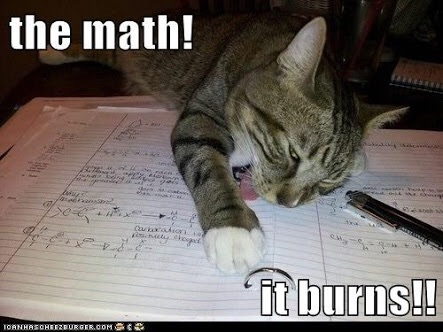

# You can also look into these with a bar plot

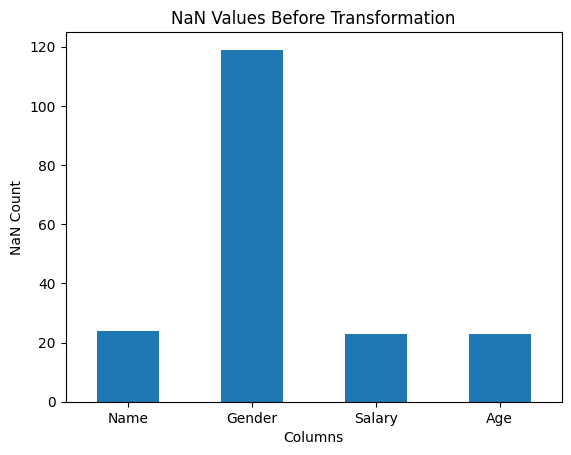

In [8]:

# Create a bar plot to compare NaN values before transformation
plt.figure()
nan_count_before.plot(kind='bar', title='NaN Values Before Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=0)
plt.show()

## Let's look at the data before the transformations!

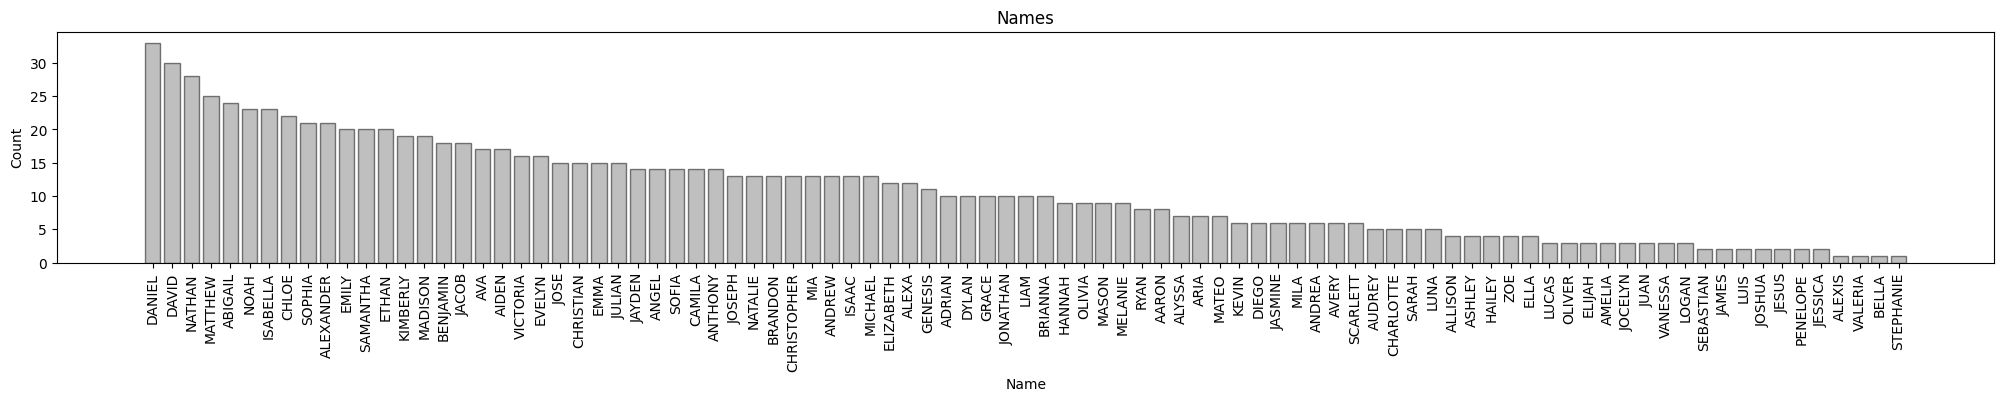

In [9]:
def plot_name(data_frame, data_frame_transform=None):
  # bar plot for "Name"
  plt.figure(figsize=(25, 3))

  if data_frame_transform is not None:
    plt.bar(data_frame["Name"].value_counts().keys(), data_frame["Name"].value_counts(), color = "grey", alpha = 0.5, edgecolor='black')
    plt.bar(data_frame_transform["Name"].value_counts().keys(), data_frame_transform["Name"].value_counts(), color = "cyan", alpha = 0.5, edgecolor='blue')
  else:
    plt.bar(data_frame["Name"].value_counts().keys(), data_frame["Name"].value_counts(), alpha = 0.5, color="grey", edgecolor='black')
  plt.xlabel('Name')
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.title("Names")


  plt.show()

plot_name(df)


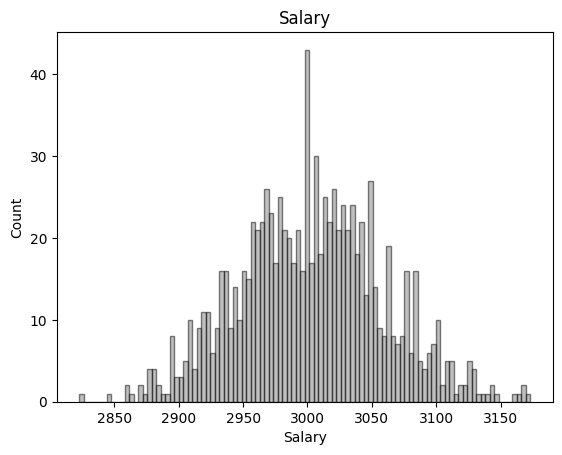

In [10]:
def plot_salary(data_frame, data_frame_transform = None):
  # histogram plot for "Salary"
  plt.figure()
  plt.title("Salary")

  if data_frame_transform is not None:
    _min, _max = [np.min([data_frame["Salary"].min(), data_frame_transform["Salary"].min()]), np.max([data_frame_transform["Salary"].max(), data_frame["Salary"].max()])]
    bins = np.linspace(_min, _max, 100, dtype=int)
    plt.hist(data_frame["Salary"], color = "grey", alpha = 0.5, edgecolor='black', bins = bins)
    plt.hist(data_frame_transform["Salary"], color = "cyan", alpha = 0.5, edgecolor='blue', bins = bins)
  else:
    plt.hist(data_frame["Salary"], bins = 100, color = "grey", alpha = 0.5, edgecolor='black')

  plt.xlabel('Salary')
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.show()

plot_salary(df)


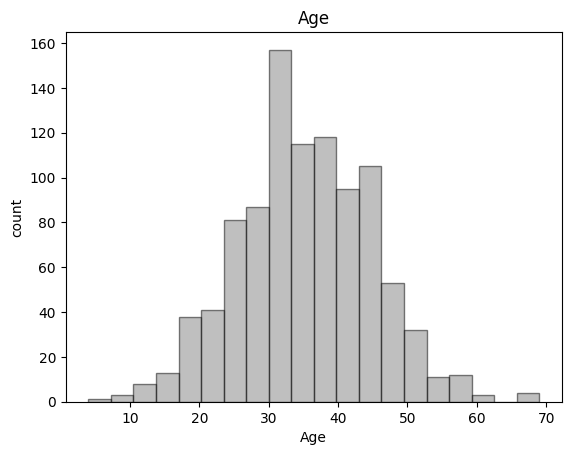

In [11]:
def plot_age(data_frame, data_frame_transform=None):
  # bar plot for "Age"
  name = "Age"
  plt.figure()
  plt.title(name)
  if data_frame_transform is not None:
    _min, _max = [np.min([data_frame[name].min(), data_frame_transform[name].min()]), np.max([data_frame_transform[name].max(), data_frame[name].max()])]
    bins = np.linspace(_min, _max, 20, dtype=int)
    plt.hist(data_frame["Age"], alpha = 0.5, color = "grey", edgecolor='black', bins = bins)
    plt.hist(data_frame_transform["Age"], alpha = 0.5, color = "cyan", edgecolor='blue', bins = bins)
  else:
    plt.hist(data_frame["Age"], color = "grey", alpha = 0.5, edgecolor='black', bins = 20)
  plt.xlabel('Age')
  plt.ylabel('count')
  plt.xticks(rotation=0)
  plt.show()

plot_age(df)

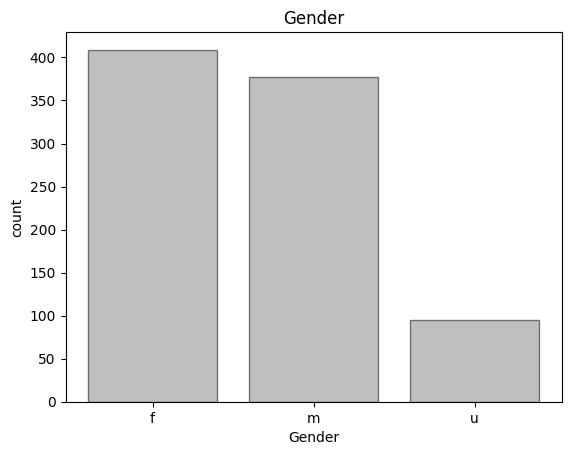

In [12]:
def plot_gender(data_frame, data_frame_transform=None):
  # bar plot for "Age"
  name = "Gender"
  plt.figure()
  plt.title(name)
  if data_frame_transform is not None:
    plt.bar(data_frame[name].value_counts().keys(), data_frame[name].value_counts(), color = "grey", alpha = 0.5, edgecolor='black')
    plt.bar(data_frame_transform[name].value_counts().keys(), data_frame_transform[name].value_counts(), color = "cyan", alpha = 0.5, edgecolor='blue')
  else:
    plt.bar(data_frame[name].value_counts().keys(), data_frame[name].value_counts(), alpha = 0.5, color="grey", edgecolor='black')
  plt.xlabel(name)
  plt.ylabel('count')
  plt.xticks(rotation=0)
  plt.show()

plot_gender(df)

# Now Let's deal with the NaNs!

image.png

# Dropping Rows with .dropa()

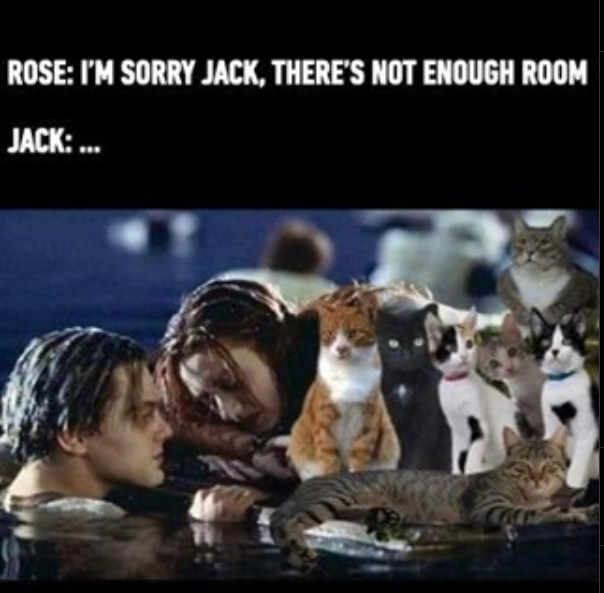

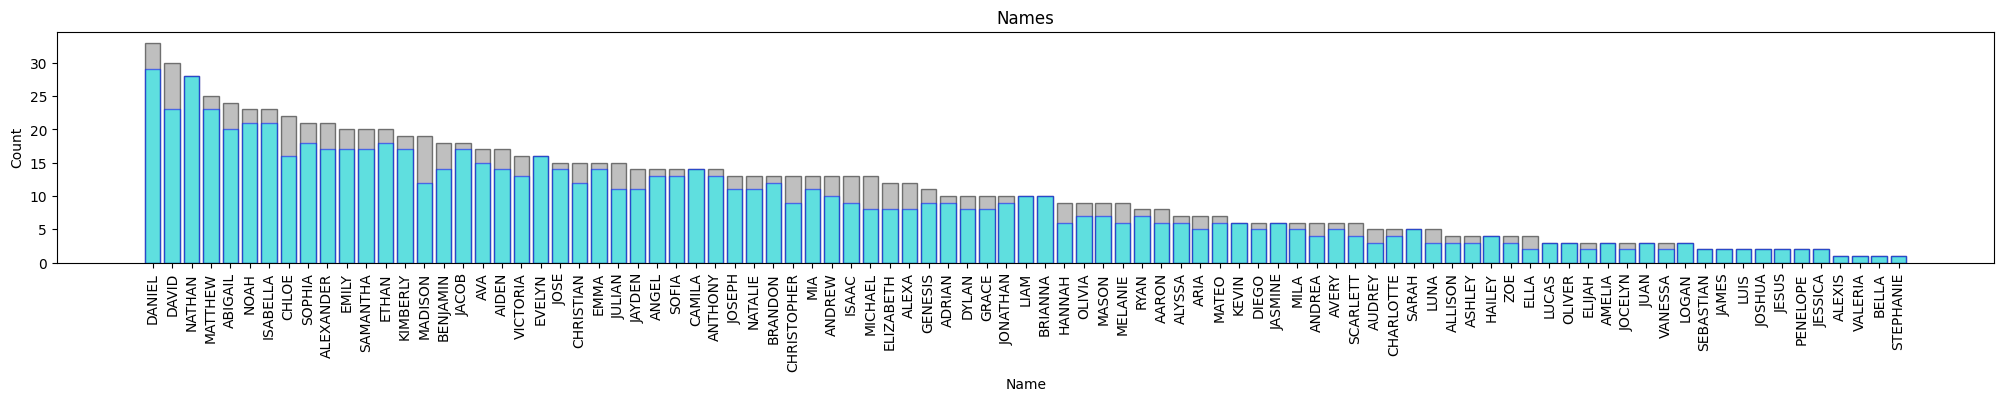

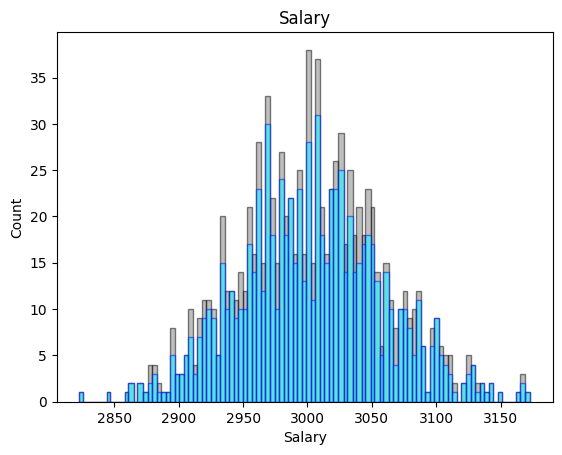

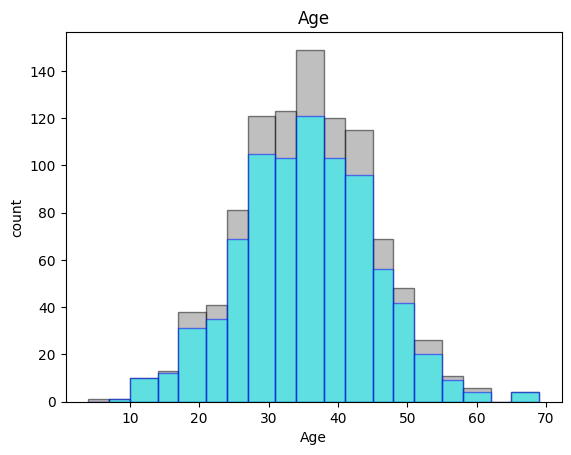

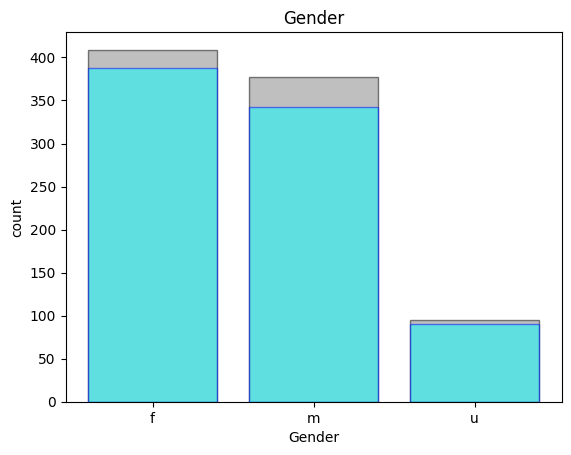


 
 
 Percentage of removed rows = 17.9%


In [13]:
df_transformed = df.copy()
df_transformed = df.dropna()

plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
plot_gender(df, df_transformed)

print("\n \n \n Percentage of removed rows = " + str((len(df.index)-len(df_transformed.index))*100/N) + "%")

# Filling rows with a value .fillna and droping rows

Name       24
Gender    119
Salary     23
Age        23
dtype: int64


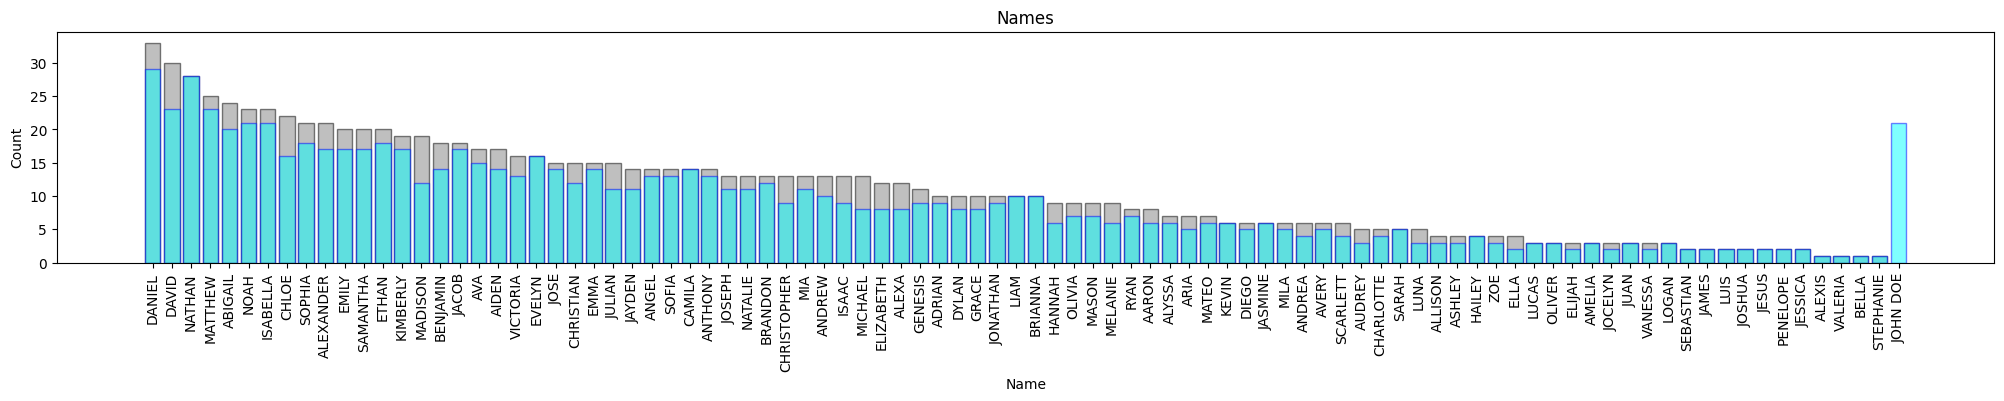

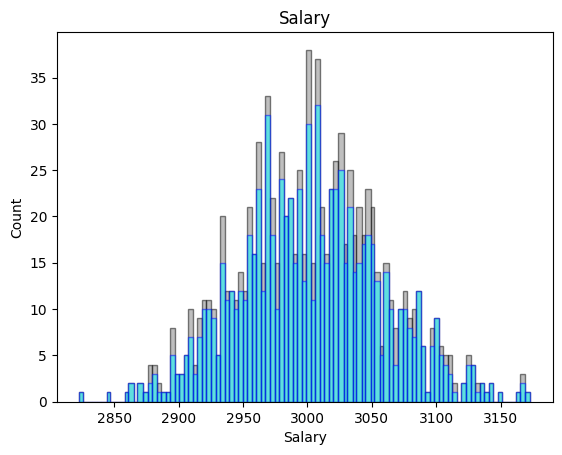

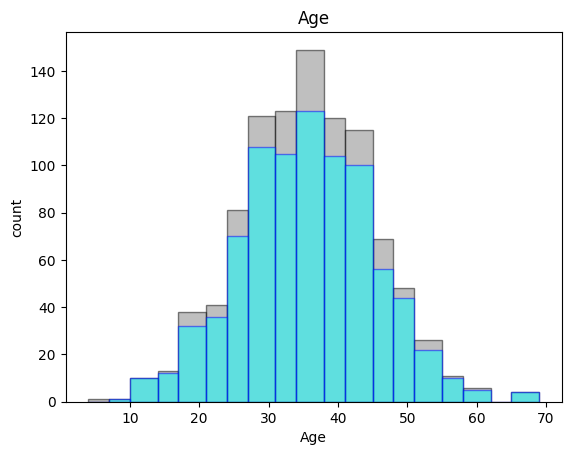

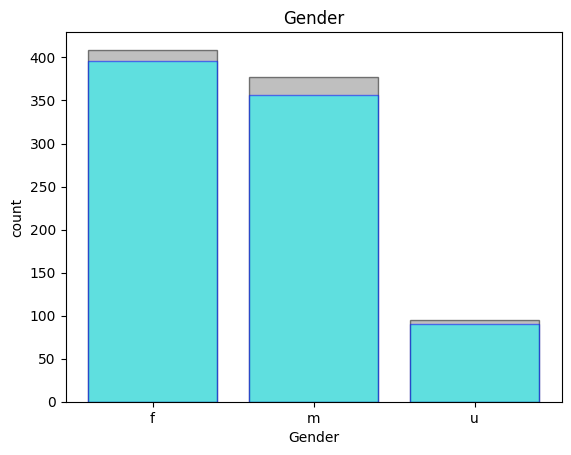


 
 
 Percentage of removed rows = 15.8%


In [14]:
df_transformed = df.copy()
df_transformed["Name"] = df_transformed["Name"].fillna("JOHN DOE")
df_transformed = df_transformed.dropna()
print(df.isna().sum())


plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
plot_gender(df, df_transformed)

print("\n \n \n Percentage of removed rows = " + str((len(df.index)-len(df_transformed.index))*100/N) + "%")


Name       24
Gender    119
Salary     23
Age        23
dtype: int64


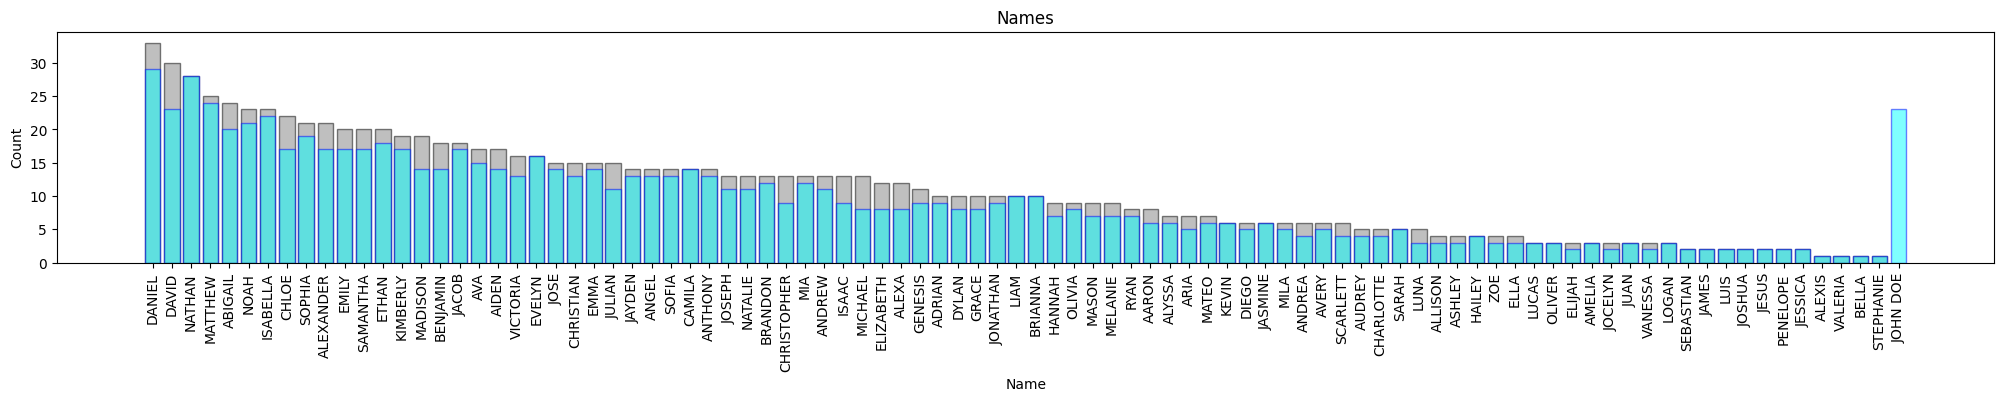

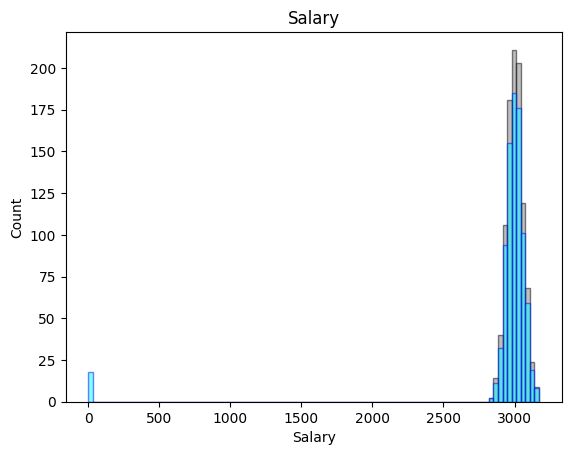

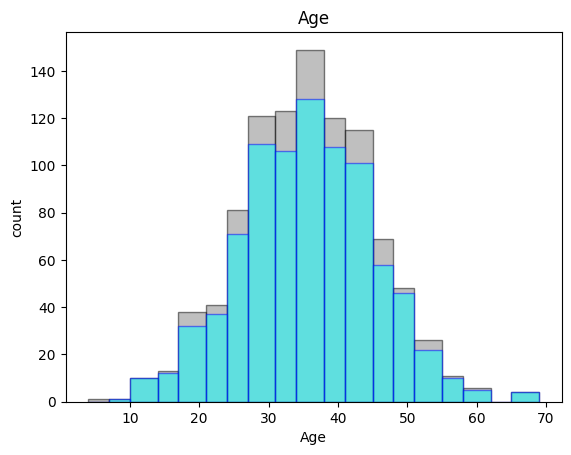

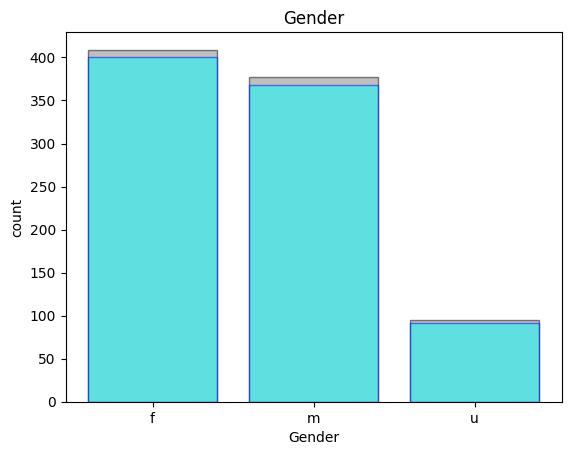


 
 
 Percentage of removed rows = 14.0%


In [15]:
df_transformed = df.copy()
df_transformed = df_transformed.fillna({"Salary": 0, "Name":"JOHN DOE"})
df_transformed = df_transformed.dropna()
print(df.isna().sum())


plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
plot_gender(df, df_transformed)

print("\n \n \n Percentage of removed rows = " + str((len(df.index)-len(df_transformed.index))*100/N) + "%")

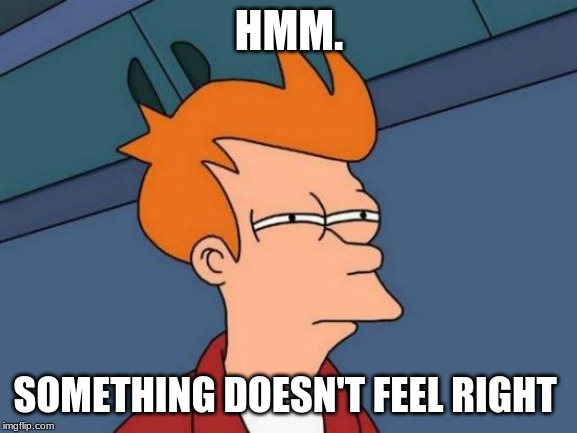

# I guess, using .mean() maybe?

Name       24
Gender    119
Salary     23
Age        23
dtype: int64


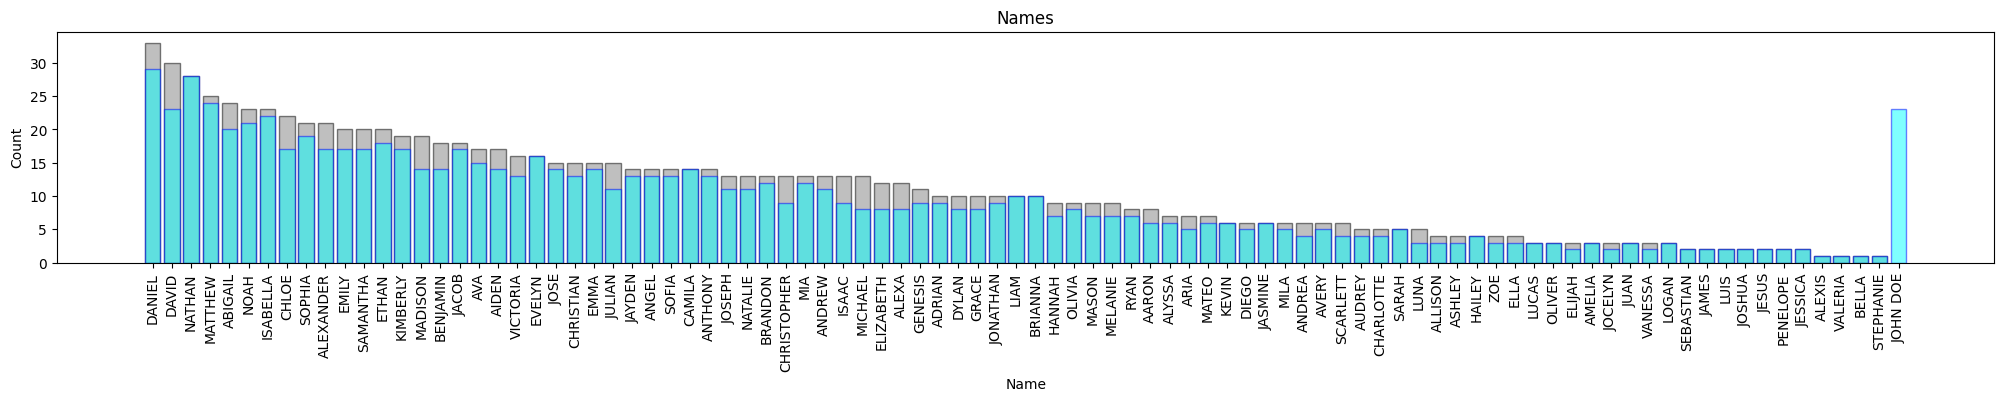

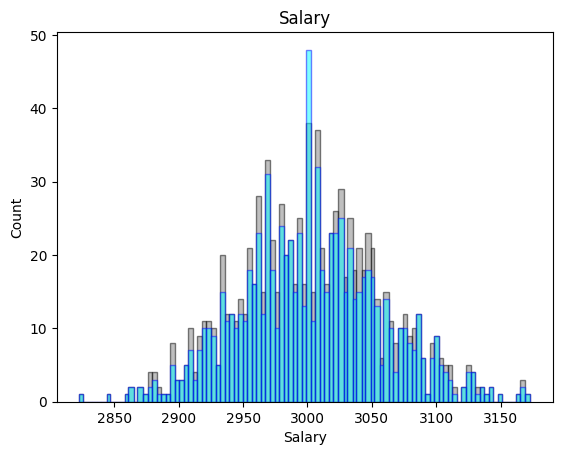

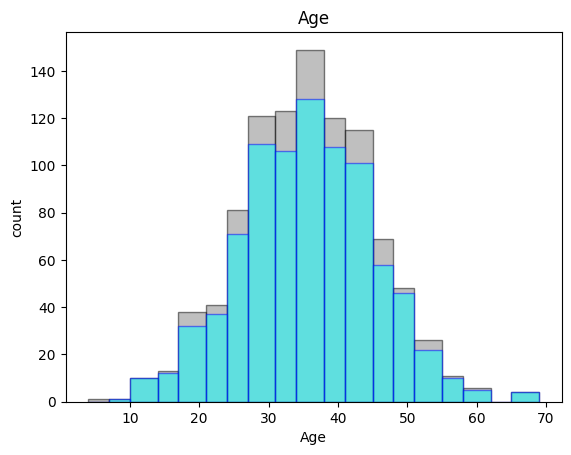

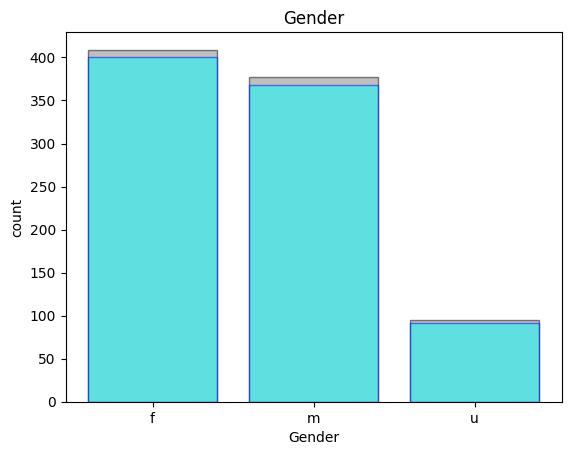


 
 
 Percentage of removed rows = 14.0%


In [16]:
df_transformed = df.copy()
df_transformed = df_transformed.fillna({"Salary": df["Salary"].mean(), "Name":"JOHN DOE"})
df_transformed = df_transformed.dropna()
print(df.isna().sum())


plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
plot_gender(df, df_transformed)

print("\n \n \n Percentage of removed rows = " + str((len(df.index)-len(df_transformed.index))*100/N) + "%")

# COOL! Now let's also fill in Age and gender

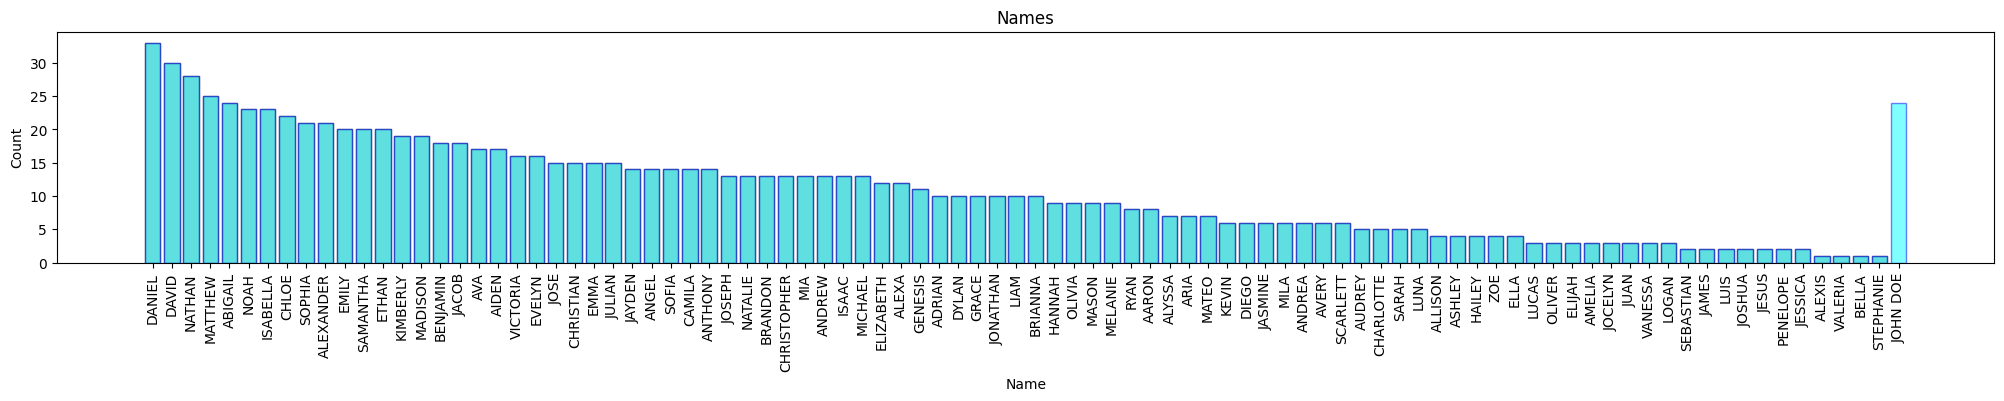

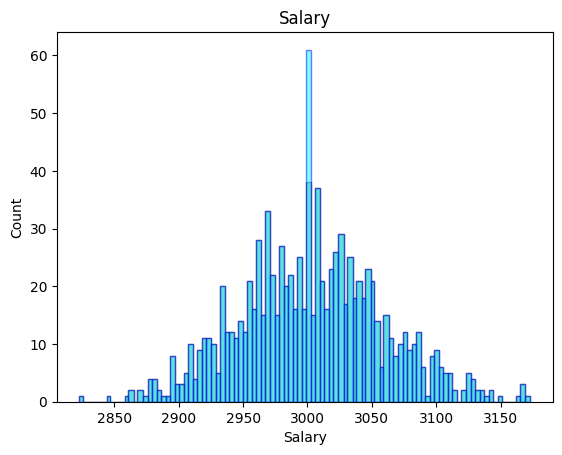

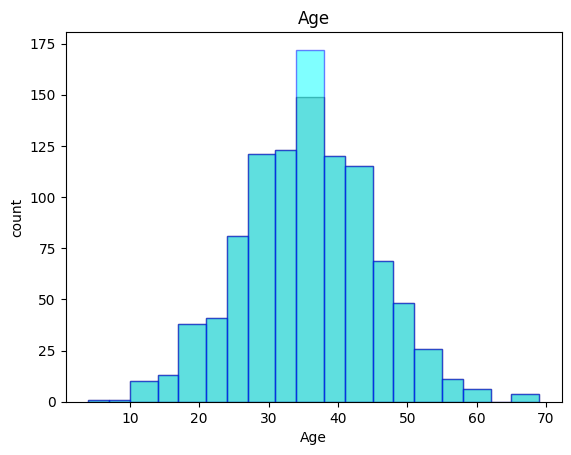

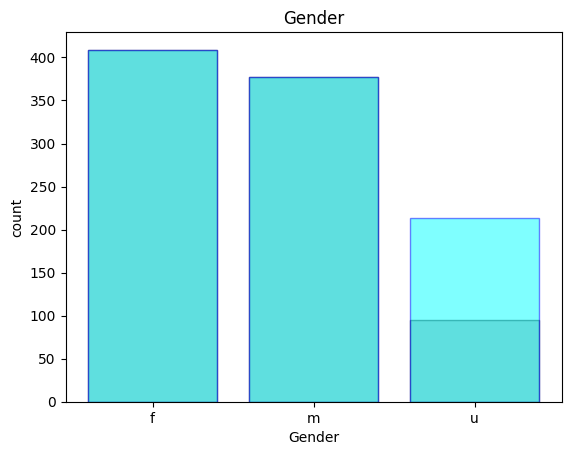


 
 
 Percentage of removed rows = 0.0%


In [17]:
df_transformed = df.copy()
df_transformed = df_transformed.fillna({"Gender": "u", "Age": df["Age"].mean(), "Salary": df["Salary"].mean(), "Name":"JOHN DOE"})
df_transformed = df_transformed.dropna()


plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
plot_gender(df, df_transformed)

print("\n \n \n Percentage of removed rows = " + str((N-len(df_transformed.index))*100/N) + "%")

# More ways!

(574.0, 580.0)

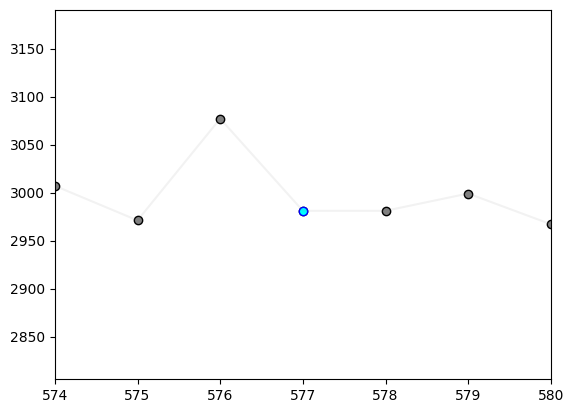

In [18]:
df_transformed = df.copy()
df_transformed = df_transformed.bfill()

indexes = df['Salary'].index[df['Salary'].apply(np.isnan)]

plt.scatter(df.index, df_transformed["Salary"], color = "grey", edgecolor="black")
plt.scatter(indexes, df_transformed["Salary"][indexes], color = "cyan", edgecolor="blue")
plt.plot(df_transformed["Salary"], color = "grey", alpha=0.1)

plt.xlim([indexes[10] - 3, indexes[10] + 3])

(574.0, 580.0)

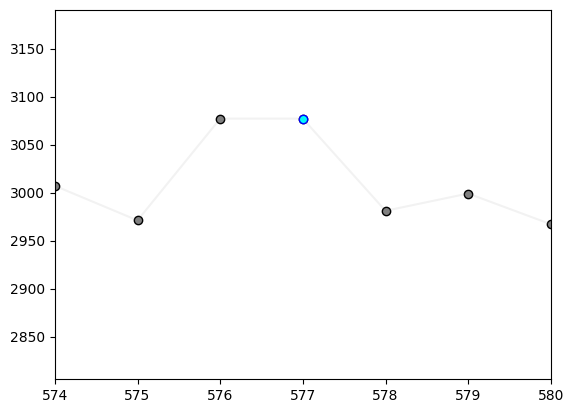

In [19]:
df_transformed = df.copy()
df_transformed = df_transformed.ffill()

indexes = df['Salary'].index[df['Salary'].apply(np.isnan)]

plt.scatter(df.index, df_transformed["Salary"], color = "grey", edgecolor="black")
plt.scatter(indexes, df_transformed["Salary"][indexes], color = "cyan", edgecolor="blue")
plt.plot(df_transformed["Salary"], color = "grey", alpha=0.1)

plt.xlim([indexes[10] - 3, indexes[10] + 3])

(574.0, 580.0)

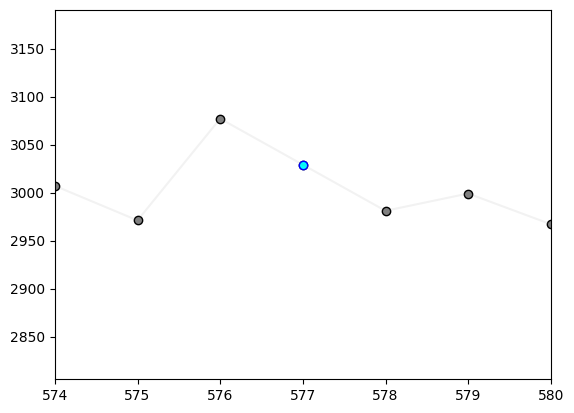

In [20]:
df_transformed = df.copy()
df_transformed = df_transformed.interpolate()

indexes = df['Salary'].index[df['Salary'].apply(np.isnan)]

plt.scatter(df.index, df_transformed["Salary"], color = "grey", edgecolor="black")
plt.scatter(indexes, df_transformed["Salary"][indexes], color = "cyan", edgecolor="blue")
plt.plot(df_transformed["Salary"], color = "grey", alpha=0.1)

plt.xlim([indexes[10] - 3, indexes[10] + 3])


# Or just drop columns! Maybe we don't want some of them

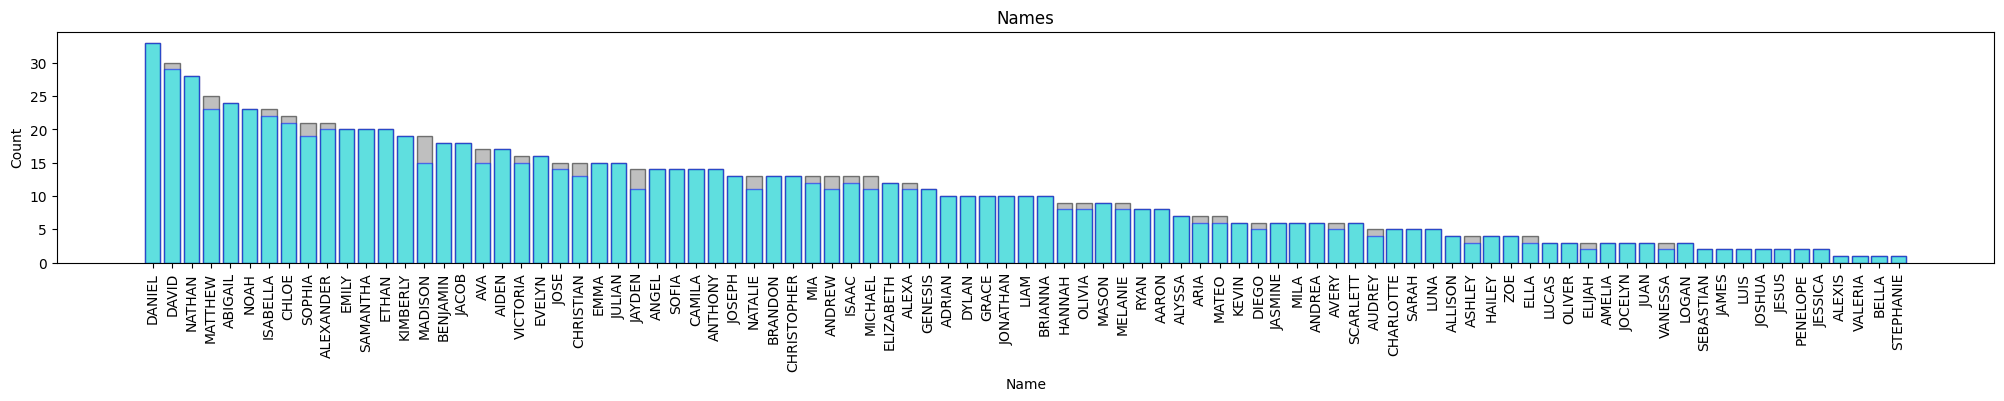

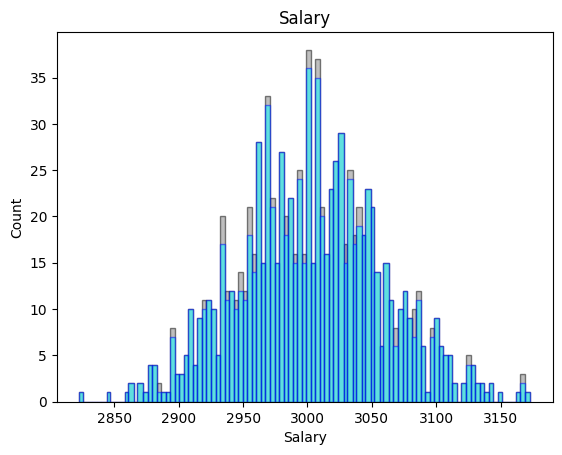

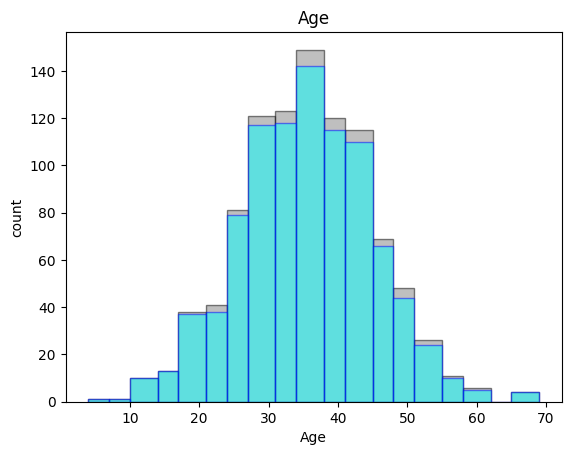


 
 
 Percentage of removed rows = 6.6%


In [21]:
df_transformed = df.copy()
#df_transformed = df_transformed.fillna({"Age": df["Age"].mean(), "Salary": df["Salary"].mean(), "Name":"JOHN DOE"})
df_transformed = df_transformed.drop(columns = "Gender")
df_transformed = df_transformed.dropna()


plot_name(df, df_transformed)
plot_salary(df, df_transformed)
plot_age(df, df_transformed)
# Ups, no gender - plot_gender(df, df_transformed)
print("\n \n \n Percentage of removed rows = " + str((N-len(df_transformed.index))*100/N) + "%")

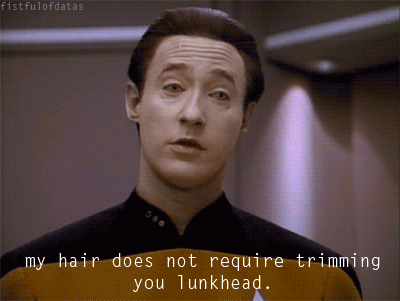

# Now we are going to create a gigantic dataset!! Wooooo

In [ ]:
N = 1000

for i in range(50000):
  data = pd.DataFrame(generate_data(N))
  data["Age"] = np.asarray(data["Age"], dtype=str)
  data.to_csv('large_data.csv', mode="a", index=False, header=False)

#dataset = pd.read_csv('large_data.csv')

In [27]:
operation_time = pd.Timestamp.now()
dataset = pd.read_csv('large_data.csv')
print((pd.Timestamp.now() - operation_time).total_seconds().format("Number of seconds to load: {}"))

<ipython-input-27-850218289add>:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('large_data.csv')


8.250489


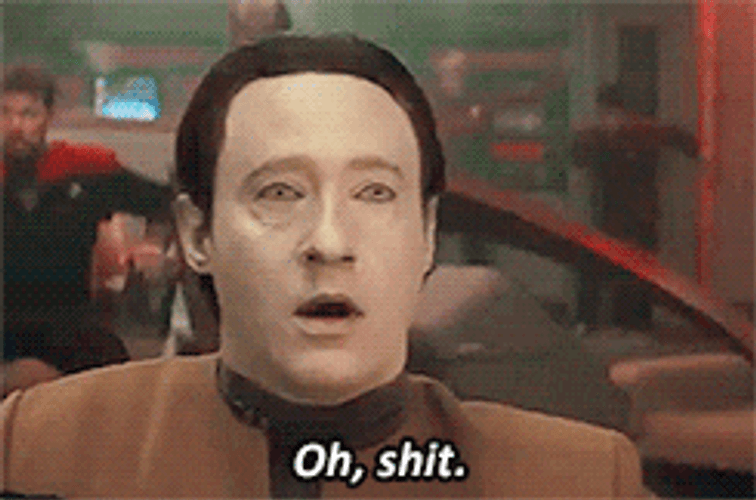

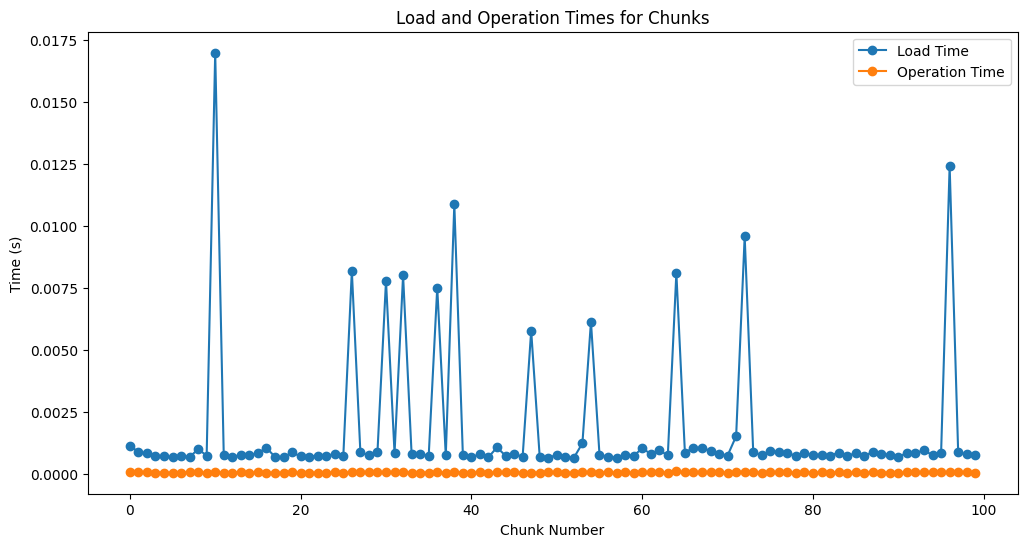

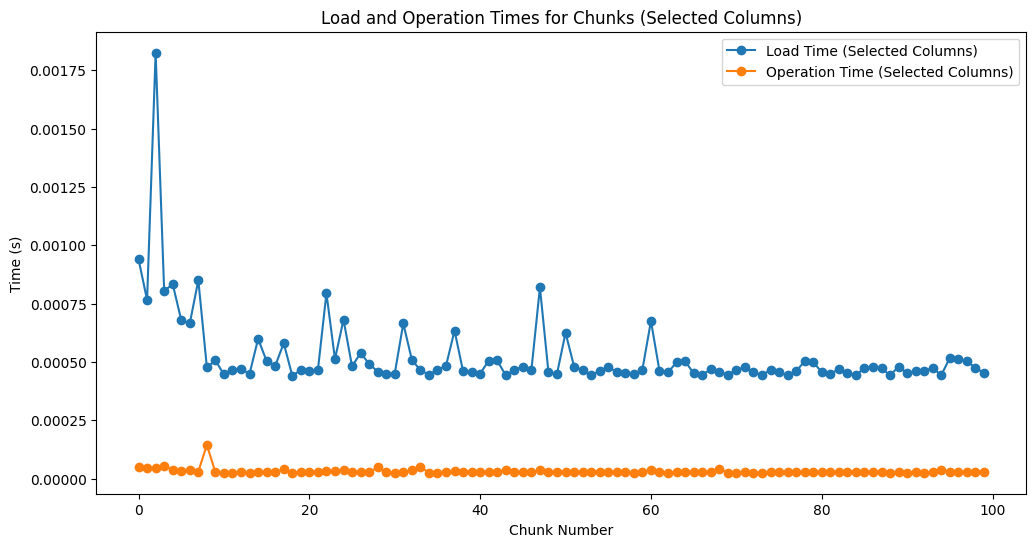

In [ ]:

# Load data in chunks and optimize data types
chunk_size = 1000
#dtype_optimization = {'Age': 'int16', 'Salary': 'int16'}

# Load the dataset in chunks
chunks = pd.read_csv('large_data.csv', chunksize=chunk_size)#, dtype=dtype_optimization)

# Check performance speed with a plot
load_times = []
operation_times = []

for chunk in chunks:
    # Measure time to load a chunk
    load_time = pd.Timestamp.now()
    # Perform some operations (e.g., filtering, aggregation) on the chunk
    chunk_filtered = chunk[chunk['Age'] > 30]
    # Measure time after operations
    operation_time = pd.Timestamp.now()

    load_times.append((operation_time - load_time).total_seconds())
    operation_times.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times
plt.figure(figsize=(12, 6))
plt.plot(load_times, label='Load Time', marker='o')
plt.plot(operation_times, label='Operation Time', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks')
plt.legend()
plt.show()

# Select columns you need only
selected_columns = ['Age', 'Name']

# Check performance speed with a plot
load_times_selected = []
operation_times_selected = []

chunks_selected = pd.read_csv('large_data.csv', usecols=selected_columns, chunksize=chunk_size)#, dtype=dtype_optimization)

for chunk in chunks_selected:
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Age'] > 30]
    operation_time = pd.Timestamp.now()

    load_times_selected.append((operation_time - load_time).total_seconds())
    operation_times_selected.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times for selected columns
plt.figure(figsize=(12, 6))
plt.plot(load_times_selected, label='Load Time (Selected Columns)', marker='o')
plt.plot(operation_times_selected, label='Operation Time (Selected Columns)', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks (Selected Columns)')
plt.legend()
plt.show()

# Merge everything at the end (optional)
# If needed, merge all chunks into a single DataFrame after optimizing data types



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Common Data Problems

# Load the "Old car price" dataset
df = pd.read_csv("car_prices.csv")

# Analyze NaN values
nan_count_before = df.isna().sum()

# Create a bar plot to compare NaN values before transformation
plt.figure(figsize=(10, 6))
nan_count_before.plot(kind='bar', title='NaN Values Before Transformation')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Fill NaN values with mean for numerical columns
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['EngineV'].fillna(df['EngineV'].mean(), inplace=True)

# Create a bar plot to compare NaN values after filling
nan_count_after = df.isna().sum()
plt.figure(figsize=(10, 6))
nan_count_after.plot(kind='bar', title='NaN Values After Filling')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=45)
plt.show()

# Drop rows with NaN values
df.dropna(subset=['Year'], inplace=True)

# Create a bar plot to compare row count before and after dropping NaN values
row_count_before = len(df)
row_count_after = len(df)
row_count_difference = row_count_before - row_count_after

plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [row_count_before, row_count_after])
plt.title('Row Count Before and After Dropping NaN Values')
plt.xlabel('Dataframe State')
plt.ylabel('Row Count')
plt.show()

# String operations to clean string columns
df['Brand'] = df['Brand'].str.strip()  # Remove leading and trailing spaces
df['Model'] = df['Model'].str.lower()  # Convert model names to lowercase

# Create a bar plot to compare string values before and after cleaning
original_brands = df['Brand'].unique()
df['Brand'] = df['Brand'].str.capitalize()
cleaned_brands = df['Brand'].unique()

plt.figure(figsize=(10, 6))
plt.bar(['Original', 'Cleaned'], [len(original_brands), len(cleaned_brands)])
plt.title('Brand Count Before and After Cleaning')
plt.xlabel('Data State')
plt.ylabel('Brand Count')
plt.show()

# Part 2: Read in Chunks and Optimize

# Check the data types of columns
print("Data Types Before Optimization:")
print(df.dtypes)

# Change data types of columns
df['Year'] = df['Year'].astype('int32')
df['Price'] = df['Price'].astype('float32')

# Check the data types after optimization
print("\nData Types After Optimization:")
print(df.dtypes)

# Check performance speed with a plot
chunk_size = 10000
load_times = []
operation_times = []

for chunk in pd.read_csv('car_prices.csv', chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times.append((operation_time - load_time).total_seconds())
    operation_times.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times
plt.figure(figsize=(12, 6))
plt.plot(load_times, label='Load Time', marker='o')
plt.plot(operation_times, label='Operation Time', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks')
plt.legend()
plt.show()

# Select columns you need only
selected_columns = ['Brand', 'Model', 'Year', 'Price']

# Check performance speed with a plot
load_times_selected = []
operation_times_selected = []

for chunk in pd.read_csv('car_prices.csv', usecols=selected_columns, chunksize=chunk_size):
    load_time = pd.Timestamp.now()
    chunk_filtered = chunk[chunk['Year'] > 2000]
    operation_time = pd.Timestamp.now()

    load_times_selected.append((operation_time - load_time).total_seconds())
    operation_times_selected.append((pd.Timestamp.now() - operation_time).total_seconds())

# Plot load times and operation times for selected columns
plt.figure(figsize=(12, 6))
plt.plot(load_times_selected, label='Load Time (Selected Columns)', marker='o')
plt.plot(operation_times_selected, label='Operation Time (Selected Columns)', marker='o')
plt.xlabel('Chunk Number')
plt.ylabel('Time (s)')
plt.title('Load and Operation Times for Chunks (Selected Columns)')
plt.legend()
plt.show()

# Merge everything at the end (optional)
# If needed, merge all chunks into a single DataFrame after optimizing data types
